<a href="https://colab.research.google.com/github/shawnmuhr/BIOL_398/blob/main/HW/biol300_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1: Colony growth over time (30 points)

In this problem, we will analyze microscopy images of a colony over time. With these images, we will re-create a plot similar to the one discussed in lecture. As a warning, there are *a lot* of parts to this problem, but it's to help walk you through the process. 

First, let's load in an example image and develop a computational pipeline for analyzing the image to get a bacterial area. We will then apply this to all the other images to get bacterial areas over time.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


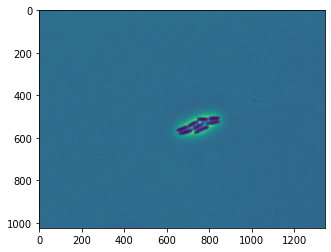

In [ ]:
# specify path
path = "/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_00.tif"

# load image
im = skimage.io.imread(path)

# take a look at the image
plt.imshow(im)

A. The background is a bit grainy. Perform median filtering on this image to get a cleaner version, where we won't have as many spurious dark pixels. Be sure to display your new image that has been filtered.

B. Plot a histogram of the pixel intensities of this filtered image. Use this histogram to pick a threshold for segmenting the image. (Hint: It might help to plot on a log scale). 

C. Using the threshold you selected in part B, conduct the segmentation on the image. You should ultimately get an image where the bacteria are labeled with `1` and the background is labeled with `0`. Be sure to display your segmented image to make sure it looks correct.

D. Finally, get the total bacterial area in the image. Depending on the exact values you used for filtering or thresholding, you should get something in the range of 6000-8000 pixels.

E. Wrap everything we done so far into a function, where the input is the path to the image file name and the output is the area (in pixels) of bacteria in that image. Make sure to include all the steps including loading, filtering, and thresholding. At this point, there is no need to `show` the image in the function.

In [ ]:
def get_bacteria_area(path):
  """Returns the bacterial area in the image specified by the path"""

  return 

Let's now get the areas for all 21 images we have. Below I've included a skeleton for how to loop through the images. We'll learn about a simpler way to do this, but for now I constuct the string name for each of the 21 images. I also print the name of the path so you can see how this works, but you can remove this line if you wish. **Note:** you may need to change the path based on where you have the files saved in *your* Google Drive, but the basic sturcture is correct.

F. Using the function you defined in part E, add to the loop below to get the area of each of the 21 images, appending to the `areas` list each time.

In [ ]:
areas = []

# loop through the number of frames
for i in range(21):

  # pad number with leading zero if needed
  if i < 10:
    int_string = "0" + str(i)
  else:
    int_string = str(i)

  # construct the path
  path = "/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_" + int_string + ".tif"

  print(path)

  # compute the area for the given image


/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_00.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_01.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_02.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_03.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_04.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_05.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_06.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_07.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_08.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_09.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_10.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_11.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase_12.tif
/content/drive/MyDrive/BIOL300_S22/data/ecoli_growth/ecoli_phase

G. Plot the results of the areas over time. To get the x-axis in meaningful units, use the fact that there were 5 mins between each image. As an aside, I haven't loaded in my typical seaborn settings since that would out gridlines over the microscopy images. This line below can be used to turn the gridlines on for just this data plot.

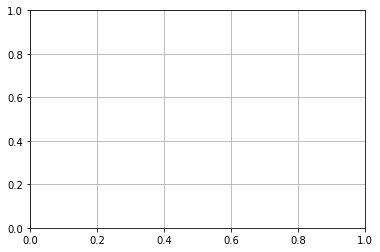

In [ ]:
plt.grid(visible=True)

H. Estimate the doubling time from this image. That is, about how many minutes does it take for the number of pixels to double? 

# Problem 2: Measuring fluorescence intensities of bacteria (50 points)

In this problem, we will use one fluorescent channel (red, from the mCherry protein) to find where the bacteria are, and then use that _segmentation mask_ to ask how fluorescence those bacteria are in another channel of interest (yellow, from YFP).

It's essential to use one channel for segmentation and one channel for measurement, since dim cells may be biologically important, but might be otherwise hard to segment out. By using RFP that's always being expressed (known as a volume marker), we can readily find the bacteria, and then measure the YFP separately, which serves as a metric of gene expression.

Ultimately, we will compare two strains: one called 'DeltaLacI' where the LacI repressor protein has been deleted, and one called 'R124' where this repressor is expressed at the level of 124 copies per cell. We expect that the presence of the repressor will silence gene expression, resulting in lower levels of YFP, but we will verify this quantitatively / computationally.

To get a sense of what this data look like, below I plot a corresponding mCherry (left) and YFP (right) image of the same bacteria from the DeltaLacI strain. We see that in the absence of the LacI repressor, the cells are quite bright in the YFP channel, as expected.

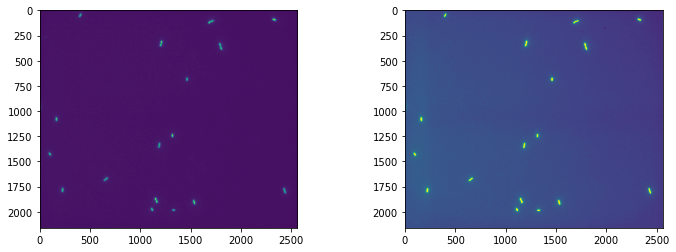

In [ ]:
# specify paths
path_mCherry = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_mCherry.tif"
path_YFP = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_YFP.tif"

# load images
im_mCherry = skimage.io.imread(path_mCherry)
im_YFP = skimage.io.imread(path_YFP)

# plot two channels next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(im_mCherry)
ax[1].imshow(im_YFP);

A. Using the **mCherry image**, segment the image using an appropriate threshold. You will likely want to plot a histogram again to determine this threshold.

B. Using the `skimage.measure.label` function we talked about in class, get a labeled version of this segmented image. Report how many objects (i.e. bacteria) you find in this image.

C. Loop through the number of bacteria in the labeled mCherry image, and for each bacterium, find the corresponding fluorescent values in the YFP image. For each bacterium, save an *average fluorescence* across the pixels. This means you will ultimately collect 20 or values, one for each bacterium. 

A clever way to do this is to multiply the segmentation mask of a single bacterium times the YFP image to recover the YFP intensities, but only for the bacteria of interest. As an example, below I define some 'toy' 3x3 images, where `toy_mCherry` is a segmented mask (with values 0 and 1 only), and `toy_YFP` is a corresponding YFP image of the same field of view. By multiplying these together, we get the YFP image back, but only at the values we care about (say a given bacterium).


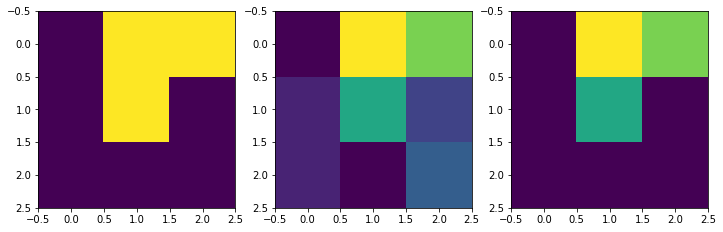

In [ ]:
toy_mCherry = np.array( [[0,1,1],
                        [0,1,0],
                        [0,0,0]])

toy_YFP = np.array( [[0,10,8],
                    [1,6,2],
                    [1,0,3]] )

overlay = toy_mCherry * toy_YFP

# plot two channels next to each other
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(toy_mCherry)
ax[1].imshow(toy_YFP)
ax[2].imshow(overlay);

Below I show how you might get an average intensity from these three images. We can see that the average intensity 8 results from the average of the three pixel values 10, 8, and 6, as expected from the toy images I made.

In [ ]:
area = toy_mCherry.sum()
total_YFP = overlay.sum()
avg_YFP = total_YFP / area
print("Average YFP expression is", avg_YFP)

Average YFP expression is 8.0


To make sure you are on the right track, you should be getting average cell intensities around 4000. 

D. Now repeat the same procedure from steps A though C, this time for the R124 strain, where we expect the YFP fluorescence to be much lower. Again for reference, I plot both images below.

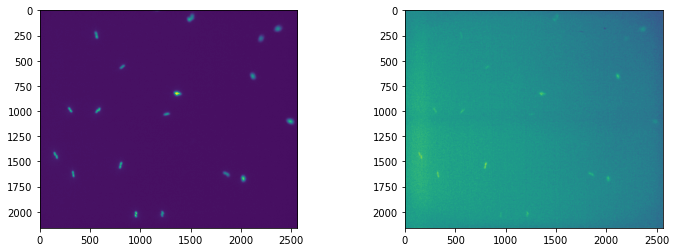

In [ ]:
# specify paths
path_mCherry = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R124_experiment_001_mCherry.tif"
path_YFP = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/R124_experiment_001_YFP.tif"

# load images
im_mCherry = skimage.io.imread(path_mCherry)
im_YFP = skimage.io.imread(path_YFP)

# plot two channels next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(im_mCherry)
ax[1].imshow(im_YFP);

We can now see the immense value of having the RFP channel! It would now be much more difficult to extract the bacterium from the YFP channel alone. 

E. Now that you have the fluorescence values for the two strains of bacteria, plot them in some way to compare their distributions. With so few data points, something like a strip plot might be most appropriate. What can you conclude about the effect of the repressor on the expression of YFP?
